# 1. Installing PyCaret

In [1]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 487 kB 6.6 MB/s 
     |████████████████████████████████| 79.9 MB 124 kB/s 
     |████████████████████████████████| 62 kB 933 kB/s 
     |████████████████████████████████| 280 kB 51.0 MB/s 
     |████████████████████████████████| 7.0 MB 41.6 MB/s 
     |████████████████████████████████| 1.5 MB 46.7 MB/s 
     |████████████████████████████████| 141 kB 19.8 MB/s 
     |████████████████████████████████| 106 kB 56.3 MB/s 
     |████████████████████████████████| 45 kB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 43 kB 2.8 MB/s 
     |████████████████████████████████| 2.0 MB 34.5 MB/s 
     |████████████████████████████████| 3.4 MB 32.6 MB/s 
     |████████████████████████████████| 72 kB 901 kB/s 
     |████████████████████████

## Wine Quality Red wine
Downloading Wine Quality Red wine data using URL

In [2]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [3]:
import pandas as pd

In [4]:
df_wine = pd.read_csv('/content/winequality-red.csv',sep=';')
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Getting Data

In [5]:
#Checking shape of data
df_wine.shape

(1599, 12)

In [35]:
df_wine.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [6]:
data = df_wine.sample(frac=0.9, random_state=786)
data_unseen = df_wine.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1439, 12)
Unseen Data For Predictions: (160, 12)


# Setting up the environment in PyCaret


In [7]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'quality', session_id=123) 

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1439, 12)"
5,Transformed data shape,"(1439, 12)"
6,Transformed train set shape,"(1007, 12)"
7,Transformed test set shape,"(432, 12)"
8,Numeric features,11
9,Preprocess,True


In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


#Comparing All models

In [9]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6583,0.5022,0.6583,0.6289,0.6387,0.4432,0.4466,0.2170
rf,Random Forest Classifier,0.6554,0.4976,0.6554,0.6244,0.6352,0.4384,0.4416,0.2870
lightgbm,Light Gradient Boosting Machine,0.6514,0.4882,0.6514,0.6250,0.6342,0.4366,0.4399,0.4670
gbc,Gradient Boosting Classifier,0.6375,0.4720,0.6375,0.6222,0.6267,0.4199,0.4221,1.1410
lda,Linear Discriminant Analysis,0.5878,0.4554,0.5878,0.5732,0.5768,0.3438,0.3457,0.0460
lr,Logistic Regression,0.5809,0.4506,0.5809,0.5561,0.5545,0.3079,0.3133,2.1270
ridge,Ridge Classifier,0.5799,0.0000,0.5799,0.4917,0.5279,0.2863,0.2960,0.0370
qda,Quadratic Discriminant Analysis,0.5660,0.4335,0.5660,0.5565,0.5586,0.3110,0.3126,0.0470
nb,Naive Bayes,0.5580,0.4458,0.5580,0.5748,0.5626,0.3250,0.3272,0.0450
dt,Decision Tree Classifier,0.5541,0.3960,0.5541,0.5545,0.5507,0.3059,0.3080,0.0470


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

#Creating a Model

### 1. Extra Tree Classifier / Best Model

In [10]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6535,0.8176,0.6535,0.6256,0.6382,0.4385,0.4400
1,0.6337,0.8433,0.6337,0.5880,0.6074,0.3965,0.3998
2,0.7129,0.8658,0.7129,0.6761,0.6926,0.5382,0.5409
3,0.6832,0.8579,0.6832,0.6478,0.6643,0.4923,0.4948
4,0.7129,0.8529,0.7129,0.6867,0.6862,0.5260,0.5333
5,0.6238,0.0000,0.6238,0.5926,0.6068,0.3931,0.3949
6,0.6733,0.0000,0.6733,0.6454,0.6533,0.4693,0.4738
7,0.6600,0.0000,0.6600,0.6521,0.6432,0.4387,0.4436
8,0.6100,0.0000,0.6100,0.5895,0.5960,0.3615,0.3639


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
#trained model object is stored in the variable 'et'. 
print(et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)


### 2. Random Forest Classifier

In [12]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6931,0.8158,0.6931,0.6653,0.6784,0.5054,0.5068
1,0.6436,0.8439,0.6436,0.5902,0.6112,0.4072,0.4121
2,0.6733,0.8520,0.6733,0.6327,0.6505,0.4710,0.4744
3,0.6931,0.8518,0.6931,0.6543,0.6728,0.5125,0.5140
4,0.6535,0.8374,0.6535,0.6247,0.6301,0.4304,0.4357
5,0.6238,0.0000,0.6238,0.5927,0.6073,0.3959,0.3974
6,0.6634,0.0000,0.6634,0.6328,0.6440,0.4554,0.4581
7,0.6500,0.0000,0.6500,0.6439,0.6344,0.4223,0.4268
8,0.6100,0.0000,0.6100,0.5830,0.5934,0.3613,0.3634


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### 3. Light gradiant Boosting Machine

In [13]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6040,0.7926,0.6040,0.5955,0.5979,0.3761,0.3770
1,0.6436,0.8159,0.6436,0.6093,0.6207,0.4108,0.4148
2,0.7426,0.8609,0.7426,0.7124,0.7222,0.5823,0.5868
3,0.6535,0.8237,0.6535,0.6137,0.6327,0.4495,0.4508
4,0.6733,0.8209,0.6733,0.6388,0.6534,0.4706,0.4734
5,0.6238,0.0000,0.6238,0.5933,0.6080,0.3985,0.3997
6,0.7030,0.0000,0.7030,0.6718,0.6757,0.5134,0.5247
7,0.6300,0.0000,0.6300,0.6225,0.6227,0.4015,0.4030
8,0.6400,0.0000,0.6400,0.6235,0.6246,0.4081,0.4127


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# Tuning top 3 Models

### 1. Extra Tree Classifier / Best Model

In [14]:
tuned_et = tune_model(et)
tuned_best = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6733,0.8055,0.6733,0.6477,0.6532,0.4602,0.4657
1,0.6139,0.8028,0.6139,0.5736,0.5809,0.3517,0.3578
2,0.5842,0.7949,0.5842,0.5440,0.5509,0.3079,0.3140
3,0.6535,0.7965,0.6535,0.6244,0.6336,0.4339,0.4377
4,0.6436,0.8118,0.6436,0.6274,0.6185,0.4109,0.4214
5,0.6733,0.0000,0.6733,0.6353,0.6466,0.4634,0.4691
6,0.6535,0.0000,0.6535,0.6016,0.6107,0.4207,0.4352
7,0.5400,0.0000,0.5400,0.5584,0.5217,0.2281,0.2332
8,0.5700,0.0000,0.5700,0.5507,0.5474,0.2825,0.2869


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6733,0.8055,0.6733,0.6477,0.6532,0.4602,0.4657
1,0.6139,0.8028,0.6139,0.5736,0.5809,0.3517,0.3578
2,0.5842,0.7949,0.5842,0.5440,0.5509,0.3079,0.3140
3,0.6535,0.7965,0.6535,0.6244,0.6336,0.4339,0.4377
4,0.6436,0.8118,0.6436,0.6274,0.6185,0.4109,0.4214
5,0.6733,0.0000,0.6733,0.6353,0.6466,0.4634,0.4691
6,0.6535,0.0000,0.6535,0.6016,0.6107,0.4207,0.4352
7,0.5400,0.0000,0.5400,0.5584,0.5217,0.2281,0.2332
8,0.5700,0.0000,0.5700,0.5507,0.5474,0.2825,0.2869


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [15]:
#tuned model object is stored in the variable 'tuned_best'. 
print(tuned_best)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)


### 2. Random Forest Classifier

In [16]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4851,0.7010,0.4851,0.4648,0.4721,0.1905,0.1918
1,0.6535,0.7378,0.6535,0.6251,0.6388,0.4458,0.4466
2,0.5743,0.7201,0.5743,0.5341,0.5463,0.2987,0.3053
3,0.5446,0.6890,0.5446,0.5112,0.5240,0.2899,0.2919
4,0.5842,0.7374,0.5842,0.5624,0.5677,0.3305,0.3343
5,0.5644,0.0000,0.5644,0.5359,0.5475,0.2951,0.2967
6,0.5743,0.0000,0.5743,0.5397,0.5477,0.3093,0.3151
7,0.5700,0.0000,0.5700,0.5784,0.5601,0.3014,0.3079
8,0.5100,0.0000,0.5100,0.5141,0.4990,0.2227,0.2304


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### 3. Light Gradient Boosting Machine

In [17]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6337,0.7949,0.6337,0.5942,0.6068,0.3912,0.3956
1,0.6238,0.8114,0.6238,0.5965,0.5889,0.3651,0.3727
2,0.6832,0.8444,0.6832,0.6794,0.6400,0.4678,0.4826
3,0.6733,0.8254,0.6733,0.6479,0.6538,0.4668,0.4738
4,0.6931,0.8199,0.6931,0.6893,0.6638,0.4888,0.4989
5,0.5941,0.0000,0.5941,0.5730,0.5723,0.3303,0.3354
6,0.6238,0.0000,0.6238,0.5325,0.5738,0.3706,0.3803
7,0.6300,0.0000,0.6300,0.6419,0.6092,0.3797,0.3869
8,0.6200,0.0000,0.6200,0.6161,0.5995,0.3665,0.3745


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Ploting a model for Best Model





### Confusion Matrix

In [18]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 3.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.0.0rc4 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.


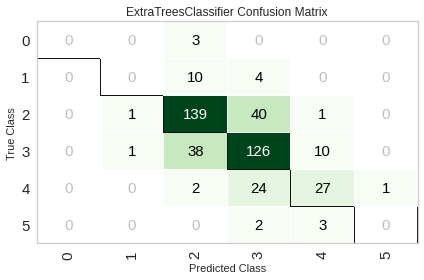

In [19]:
plot_model(tuned_best, plot = 'confusion_matrix')

### Classification Report

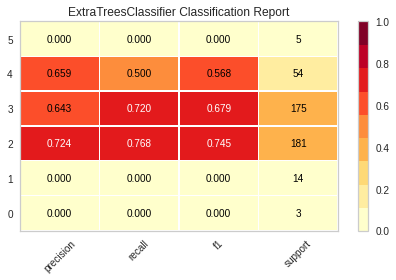

In [20]:
plot_model(tuned_best, plot = 'class_report')

### Decision Boundary Plot

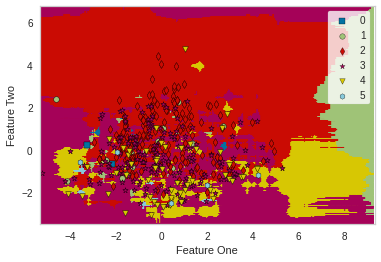

In [21]:
plot_model(tuned_best, plot='boundary')

### Prediction Error Plot

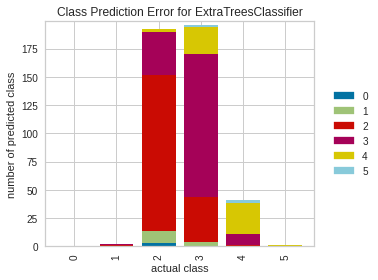

In [22]:
plot_model(tuned_best, plot = 'error')

In [23]:
#evaluate_model(tuned_lightgbm)

# Predict on test/hold-out sample

In [24]:
predict_model(tuned_best);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6759,0.8388,0.6538,0.6327,0.6392,0.4756,0.4779


#Finalize model for deployment

In [25]:
final_best = finalize_model(tuned_best)

In [26]:
#Final Extra tree classifier parameters for deployment
print(final_best)

Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'su...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='auto',
                                   

# Predict on unseen data

In [27]:
unseen_predictions = predict_model(final_best, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7625,0.9067,0.7973,0.6956,0.7102,0.6147,0.6319


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
0,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5,0.88
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,5,0.52
2,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,5,0.55
3,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,5,0.67
4,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8,5,5,0.91


#Saving the model

In [28]:
save_model(final_best,'Final Best Model 03Dec2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'su...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                    

# Loading the saved model

In [29]:
saved_final_best = load_model('Final Best Model 03Dec2022')

Transformation Pipeline and Model Successfully Loaded


In [30]:
new_prediction = predict_model(saved_final_best, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7625,0.9067,0.7973,0.6956,0.7102,0.6147,0.6319


In [31]:
new_prediction.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
0,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5,0.88
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,5,0.52
2,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,5,0.55
3,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,5,0.67
4,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8,5,5,0.91


#Summary and Next Steps 

In this research project, we used pycaret using pycaret.classification. Imported data from pycaret repository, setting up the environment in pycaret and built multiclass models. Created a model for top 3 models, performing stratified cross validation and evalated classification matrics. Where, the top models for the data Wine Quality for Red wine in classification are extra tree classifier, Random forest Classifier, Light Gradient Boosting Machine On the basis of Most accuracy, AUC etc. Using the code compare_model(). Then tuned the models , automatically tune the hyper-parameters of multiclass model. Plotted models for the top 3 models, confusion matrix, classification report, Decision Boundary plot, and prediction error Plot. Then Finalized the best model, predicted on new/unseen data. And Finally saved a model for our future use.



For next steps I would like to know more about the other models, for this project I researched on the top 3 models but I would like to work on other models and try other libaries used for similar tasks.